# 1. Introdução
Foi falado anteriormente sobre as distribuições mais comuns, mas quando se diz a respeito da distribuição normal, deve-se ter um capítulo à parte por ser a distribuição mais conhecida e utilizada na Estatística/Probabilidade. Esta distribuição é representada por uma curva simétrica em torno da média, apresentando uma forma de sino (bell shape).

A curva da distribuição normal representa o comportamento de diversos processos e fenômenos comuns, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, entre outras aplicações.

A distribuição normal serve também como base para a inferência estatística clássica, sendo a premissa em diversos modelos e métodos.

# 2. Definição Matemática
A variável aleatória contínua X que tome todos os valores na reta real -infinito < X < + infinito segue uma distribuição normal (também nomeada como Gaussiana), se sua função de densidade de probabilidade é dada por:  f(x) = (1/sigma*sqrt(2*pi))*e^((-x-mu)^2/(2*sigma^2))

Onde respectivamente temos como valor esperado e variância da distribuição normal:

Valor esperado: E[X] = mu

Variância: V[X] = sigma^2


Usualmente aplica-se a notação X ~ N(mu, sigma^2) para representar uma variável aleatória com distribuição normal de valor esperado/média mu e variância sigma^2.

Uma propriedade da distribuição Normal é que pela sua característica simétrica, todas as métricas de posição coincidem no ponto médio (sendo elas média, mediana e moda).

Para criar a curva da distribuição normal, pode-se utilizar uma implementação em Python:

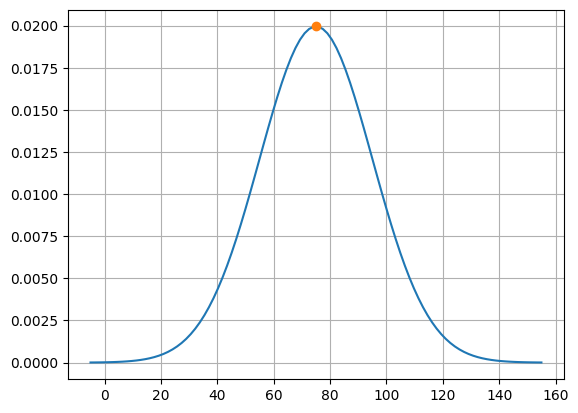

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def dist_normal(sigma, mu, x):
  return (1/(sigma*(np.sqrt(2*np.pi))))*np.exp(-0.5*(((x-mu)/sigma)**2))


mu = 75
sigma = 20
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

plt.plot(x, dist_normal(sigma, mu, x))
plt.plot(mu, dist_normal(sigma, mu, mu), 'o')
plt.grid()

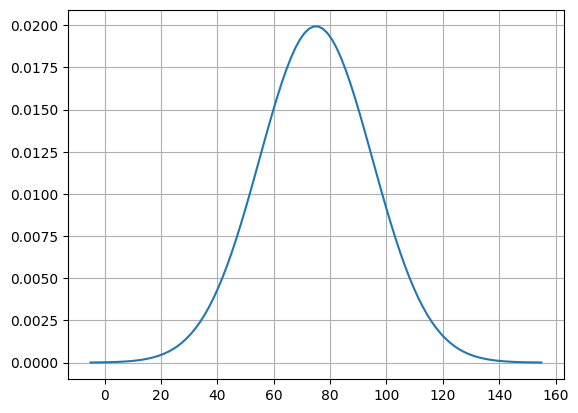

In [20]:
# Utilizando scipy

from scipy.stats import norm


mu = 75
sigma = 20
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

dist_n = norm(loc = mu, scale = sigma)
plt.plot(x, dist_n.pdf(x))
plt.grid()

https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal#

# 3. Z-Score (Normalização dos Dados)

Naturalmente, devido à complexidade da função densidade de probabilidade para a distribuição normal, não é tão usual trabalhar diretamente com a fórmula. Para isso então que existe uma transformação conhecida como normalização ou mesmo Z-Score, onde este parâmetro nada mais é que o número de desvios padrões que a observação está com relação à média:

$$ z = \frac{x - \mu}{\sigma} $$

$$  z \sigma = x - \mu $$


Vale ressaltar que, este método é altamente dependente da hipótese de que os dados observados são normalmente distribuídos, portanto funciona como apenas uma boa aproximação para muitos casos, em geral.

Os valores de Z-score também podem ser definidos a partir de uma tabela padronizada para distribuições normais, seguindo uma forma mais tradicional:

https://pt.wikipedia.org/wiki/Teste_Z

# 4. Aplicações
Para ilustrar as funcionalidades da Distribuição Normal, seguem alguns exemplos de aplicação prática:

Exemplo 1: Se uma variável aleatória $ X \sim  \mathcal{N}(\mu=165,\,\sigma^{2} = 9) $, calcule P(X < 162)

Dado os valores de $\mu$ e $\sigma^{2}$, defina a probabilidade a partir do Z-Score:




In [26]:
import scipy.stats as st


mu = 165
sigma = np.sqrt(9)
x = 162

z = (x-mu)/sigma

# Calculando a integral da densidade de probabilidade:

print(st.norm.cdf(z))

0.15865525393145707


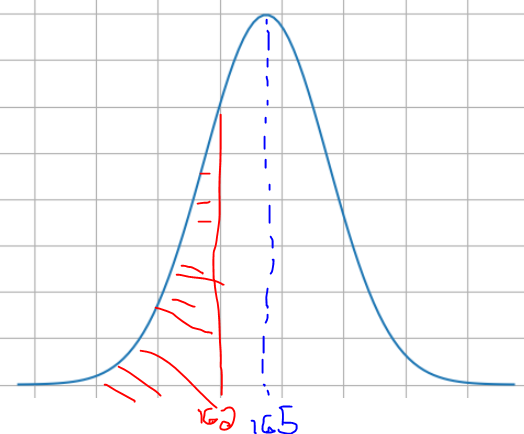

Exemplo 2: Dado a variável aleatória X ~ N(mu=10, sigma^2= 4), calcule a probabilidade P(X > 13)

Lembrando que para calcular essa probabilidade temos que fazer da seguinte forma:  P(X > 13) = 1 - P( X <= 13)

In [27]:
import scipy.stats as st


mu = 10
sigma = np.sqrt(4)
x = 13

z = (x-mu)/sigma

p_menor = st.norm.cdf(z)
p_maior = 1-p_menor

print(p_maior)

0.06680720126885809


Exemplo 3: O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 75,5 Kg e o desvio padrão é 7,5 Kg. Admitindo que os pesos são normalmente distribuídos, determine a percentagem de estudantes que pesam:

A) entre 60 e 77,5 Kg:


Desenvolvendo o exercício a partir do Z-Score:



P(60 <= X <= 77,5) = P(60-mu/sigma <= X-mu/sigma <= 77,5-mu/sigma) = P(60-mu/sigma <= Z <= 77,5-mu/sigma)


= P(Z <= 77,5-mu/sigma) - P(Z <= 60 -mu/sigma)


Agora fazendo a implementação dos cálculos utilizando a biblioteca SciPy:



In [28]:
import scipy.stats as st


mu = 75.5
sigma = 7.5

z_60 = (60-mu)/sigma
p_menor_60 = st.norm.cdf(z_60)

z_77_5 = (77.5-mu)/sigma
p_menor_77_5 = st.norm.cdf(z_77_5)

resultado = p_menor_77_5 - p_menor_60

print(resultado)

0.5857543024471563


O mesmo exemplo poder ser resolvido também com a implementação de simulações de uma distribuição normal com os mesmos parâmetros mu e sigma e contar quantos elementos da simulação se encontram dentro do intervalo entre 60 e 77,5 Kg:

In [30]:
mu = 75.5
sigma = 7.5

N = 100000

np.random.seed(2)

X = np.random.normal(mu, sigma, N)

m = 0
for x in X:
  if x > 60 and x < 77.5:
    m = m + 1

prob_regiao_simulacao = m/N

prob_regiao_simulacao

0.58721

B) pesam mais do que 92,5 Kg

P(X >= 92,5) = P(X-mu/sigma >= 92,5-mu/sigma) = P(Z >= 92,5-mu/sigma)


= 1 - P(Z <= 92,5-mu/sigma)

In [31]:
import scipy.stats as st


mu = 75.5
sigma = 7.5

z = (92.5-mu)/sigma
p_menor = st.norm.cdf(z)

resultado = 1-p_menor

print(resultado)

0.011705298080558313


Aplicando novamente o mesmo processo mas com simulações:

In [32]:
mu = 75.5
sigma = 7.5

N = 100000

np.random.seed(2)

X = np.random.normal(mu, sigma, N)

m = 0
for x in X:
  if x > 92.5:
    m = m + 1

prob_regiao_simulacao = m/N

prob_regiao_simulacao

0.01243

# 5. Teorema Central do Limite
O Teorema Central do Limite (algumas vez denominado Teorema do Limite Central) é uma das ferramentas mais poderosas da estatística, e é esse teorema que dá fundamentação para a distribuição normal ser amplamente utilizada como base para muitos outros resultados. O princípio por trás deste teorema é que muitos dos resultados da inferência estatística são válidos assumindo a hipótese que esses dados sob análise (mais precisamente, os estimadores pontuais) seguem uma distribuição normal.

No entanto, há muitos casos de interesse em que a distribuição populacional não é normal, onde na verdade não é possível afirmar isso sobre a distribuição populacional, a partir apenas das amostras. Dado este contexto que o Teorema Central do Limite atua, pois ele mostra que os estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, independente da distribuição populacional destes dados.

Vamos enunciá-lo, como:


Seja uma amostra aleatória (X1,X2,...,Xn) retiradas de uma população com média mu e variância sigma. A distribuição amostral de X aproxima-se, para n grande (n > 30), de uma distribuição normal com média E[X]=mu e variância sigma^2/n.


Exemplo de Aplicação: Seja a variável aleatória com distribuição de probabilidade: P(X = 3) = 0,4; P(X = 6) = 0,3; P(X = 8) = 0,3. Uma amostra com 40 observações é sorteada. Qual é a probabilidade de que a média amostral seja maior do que 5?


Primeiramente, deve-se definir o valor esperado e a esperança desta distribuição para usar como referência para a distribuição normal:




Calculando o valor teórico da probabilidade, utilizando o Z-Score:

Agora, dado que não se sabe se a distribuição é uma normal ou não, deve-se sortear várias amostras de tamanho n = 40 e verificar qual a probabilidade da média dessas amostras ser maior do que 5: